# Midterm

Ok, we've reviewed a lot so far, so before we continue onto more specific kinds of analysis, using LLMs, and machine learning, complete this notebook that builds on the lessons in this series on pandas and EDA.

___

## Dataset
### *The Pudding*'s Film Dialogue Data

The dataset that we're working with in this lesson is taken from Hannah Andersen and Matt Daniels's *Pudding* essay, ["Film Dialogue from 2,000 screenplays, Broken Down by Gender and Age"](https://pudding.cool/2017/03/film-dialogue/). The dataset provides information about 2,000 films from 1925 to 2015, including characters’ names, genders, ages, how many words each character spoke in each film, the release year of each film, and how much money the film grossed. They included character gender information because they wanted to contribute data to a broader conversation about how "white men dominate movie roles."

___

## Import Pandas

In [1]:
import pandas as pd
pd.options.display.max_rows = 200

## Import the Data

In [2]:
film_df = pd.read_csv('../data/Pudding/Pudding-Film-Dialogue-Clean.csv', delimiter=",", encoding='utf-8')

## Overview

To look at a random *n* number of rows in a DataFrame, we can use a method called `.sample()`.

In [3]:
film_df.sample(10)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
15907,Boyhood,2014,Annie,woman,213,0.012831,NaN,27.0,5386
22717,Munich,2005,Wael Zwaiter,man,177,0.016442,60.0,64.0,9025
4954,The Book of Eli,2010,Lombardi,man,490,0.025633,67.0,104.0,1886
20571,Legend,2015,Nipper Read,man,186,0.008850,51.0,1.0,7922
15767,Girl with a Pearl Earring,2003,Maria Thins,woman,639,0.077193,68.0,16.0,5315
451,Being Human,1994,Thalia,woman,292,0.023573,NaN,3.0,734
17903,Big Fan,2009,Theresa,woman,164,0.040325,NaN,NaN,6607
9164,Mute Witness,1995,Lyosha,man,204,0.056183,NaN,2.0,2969
8590,Lost Horizon,1937,Barnard,man,2854,0.108965,45.0,NaN,2807
9472,Out of Sight,1998,Raymond Cruz,man,348,0.010959,39.0,69.0,3047


Generate information about all the columns in the data 

In [4]:
film_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23047 entries, 0 to 23046
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   23047 non-null  object 
 1   release_year            23047 non-null  int64  
 2   character               23047 non-null  object 
 3   gender                  23047 non-null  object 
 4   words                   23047 non-null  int64  
 5   proportion_of_dialogue  23047 non-null  float64
 6   age                     18262 non-null  float64
 7   gross                   19386 non-null  float64
 8   script_id               23047 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.6+ MB


Just like Python has different data types, Pandas has different data types, too. These data types are automatically assigned to columns when we read in a CSV file. We can check these Pandas data types with the [`.dtypes` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html).



| **Pandas Data Type** |  **Explanation**                                                                                   |
|:-------------:|:---------------------------------------------------------------------------------------------------:|
| `object`         | string                                                                               |
| `float64`         | float                                               |
| `int64`       | integer                                                        |
| `datetime64`       |  date time              

Make a histogram of the DataFrame

array([[<AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'words'}>],
       [<AxesSubplot:title={'center':'proportion_of_dialogue'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'script_id'}>]], dtype=object)

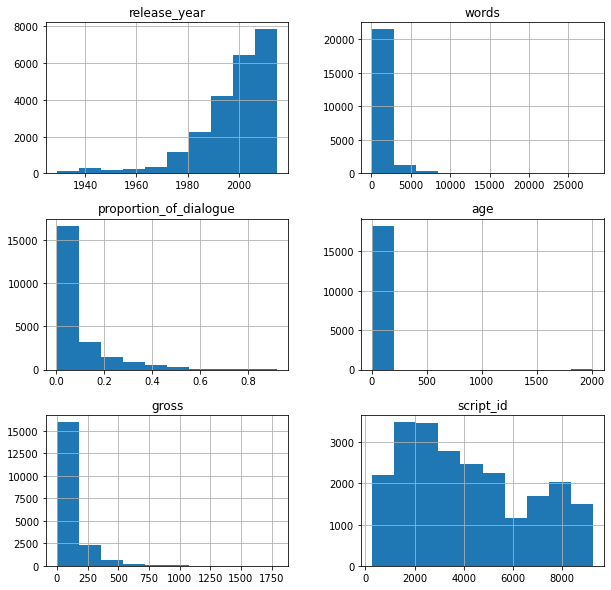

In [5]:
film_df.hist(figsize=(10,10))

Generate descriptive statistics for all the columns in the data 

In [6]:
film_df.describe(include='all')

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
count,23047,23047.000000,23047,23047,23047.000000,23047.000000,18262.000000,19386.000000,23047.000000
unique,1994,NaN,17543,3,NaN,NaN,NaN,NaN,NaN
top,Lone Star,NaN,Doctor,man,NaN,NaN,NaN,NaN,NaN
freq,40,NaN,37,16131,NaN,NaN,NaN,NaN,NaN
mean,NaN,1998.132425,NaN,NaN,907.902634,0.086518,42.275052,106.735428,4194.804486
std,NaN,14.746052,NaN,NaN,1399.616135,0.107746,57.912595,145.861933,2473.037601
min,NaN,1929.000000,NaN,NaN,101.000000,0.001537,3.000000,0.000000,280.000000
25%,NaN,1992.000000,NaN,NaN,193.000000,0.019773,30.000000,22.000000,2095.000000
50%,NaN,2001.000000,NaN,NaN,396.000000,0.042423,39.000000,56.000000,3694.000000
75%,NaN,2009.000000,NaN,NaN,980.000000,0.104171,50.000000,136.000000,6224.500000


### ❓ What patterns or outliers do you notice?

ENTER YOUR RESPONSE

## Drop Rows

In [7]:
film_df[film_df['age'] > 100]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
4024,American Psycho,2000,Harold Carnes,man,434,0.025271,2000.0,24.0,1639
5254,Case 39,2009,Margaret Sulliv,woman,310,0.037944,2009.0,15.0,1962
5370,Chaos,2005,Bernie Callo,man,244,0.015051,2005.0,NaN,1985
5950,The Departed,2006,Realtor,man,148,0.005575,2006.0,175.0,2144
6899,Get Carter,2000,Thorpey,man,133,0.026552,2000.0,24.0,2380
7787,Into the Wild,2007,Bull,man,188,0.009936,2007.0,23.0,2625
7968,Jay and Silent Bob Strike Back,2001,Silent Bob'S Mo,woman,224,0.009292,2001.0,46.0,2673
9233,Never Been Kissed,1999,Monty Malik,man,104,0.005219,1999.0,95.0,2986
9617,The Piano,1993,Nessie,woman,116,0.012262,1993.0,84.0,3095
9819,Raging Bull,1980,Reporter,man,300,0.013364,1980.0,NaN,3169


If you want to double check, you can examine the [data that the Pudding shared here](https://github.com/matthewfdaniels/scripts/blob/graphs/character_list5.csv) (you can control + F to search for specific characters).

In [8]:
film_df = film_df.drop(film_df[film_df['age'] > 100].index) 

In [10]:
film_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23031 entries, 0 to 23046
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   23031 non-null  object 
 1   release_year            23031 non-null  int64  
 2   character               23031 non-null  object 
 3   gender                  23031 non-null  object 
 4   words                   23031 non-null  int64  
 5   proportion_of_dialogue  23031 non-null  float64
 6   age                     18246 non-null  float64
 7   gross                   19373 non-null  float64
 8   script_id               23031 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.8+ MB


In [11]:
film_df[film_df['age'] > 100]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id


## Rename Columns

In [12]:
film_df = film_df.rename(columns={'imdb_character_name': 'character', 'year': 'release_year'})

In [13]:
film_df.head()

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
0,The Bridges of Madison County,1995,Betty,woman,311,0.048639,35.0,142.0,280
1,The Bridges of Madison County,1995,Carolyn Johnson,woman,873,0.136534,NaN,142.0,280
2,The Bridges of Madison County,1995,Eleanor,woman,138,0.021583,NaN,142.0,280
3,The Bridges of Madison County,1995,Francesca Johns,woman,2251,0.352049,46.0,142.0,280
4,The Bridges of Madison County,1995,Madge,woman,190,0.029715,46.0,142.0,280


## Filter

Find a specific film that you're intersted and then filter the DataFrame for only rows relevant to that film. 

If you want to search for films by decade and genre, you can [search the with the Pudding's handy data viz here](https://pudding.cool/2017/03/film-dialogue/embed.html).

In [179]:
film_filter = ...

If you want to sort by characters who speak the most, feel free to add `.sort_values(by='words', ascending=False)`

In [ ]:
film_df[film_filter]

Now pick a character from this film (or another character) and filter the DataFrame by character.

In [179]:
character_filter = ...

In [ ]:
film_df[character_filter]

### ❓ How does this data align with your experience/knowledge of the film?

Enter your response 

### ❓ How do these specific examples influence your thoughts about the data collection and categorization process? What would you have done differently (if anything)?

Enter your response

## Sort Values

Sort the DataFrame from the character who has the highest `proportion_of_dialogue` to the lowest.  Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [ ]:
film_df...

Sort the DataFrame from the character who has the lowest `proportion_of_dialogue` to the highest. Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [ ]:
film_df...

Sort the DataFrame from the character who speaks the least number of `words` to the character who speaks the most number of words. Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [ ]:
film_df...

### ❓ What patterns do you notice here? What surprises you or doesn't surprise you?

Enter your response

## Groupby

Group by film and then calculate the sum total for every column.

In [ ]:
film_df.groupby...

Group by film, isolate the `words` column, and then calculate the sum total for every column.

In [ ]:
film_df.groupby...

Group by film AND gender, isolate the column `words`, and then calculate the sum total for every column.

*Note: Remember that to group by multiple columns, you need to put the column names in square brackets `[]`.*

In [ ]:
film_df.groupby...

## Filter, Then Groupby

Filter the DataFrame for only characters labeled as `woman`

In [6]:
women_filter = film_df['gender'] == 'woman'

In [7]:
women_film_df = film_df[women_filter]

Filter the DataFrame for only characters labeled as `man`

In [8]:
men_filter = film_df['gender'] == 'man'

In [9]:
men_film_df = film_df[men_filter]

Now group `women_film_df` by film, isolate the `words` column, and sum the `words` spoken by women.

In [10]:
women_film_df.groupby('title')['words'].sum()

title
(500) Days of Summer          5738
10 Things I Hate About You    8992
12 Years a Slave              3452
12 and Holding                5324
127 Hours                      809
                              ... 
Zero Effect                   2216
Zerophilia                    4612
Zodiac                        1421
eXistenZ                      3752
xXx                            998
Name: words, Length: 1940, dtype: int64

Assign this Series to a new variable `women_by_film`

In [11]:
women_by_film = women_film_df.groupby('title')['words'].sum()
women_by_film

Using the same construction, make a new another new variable `men_by_film`

In [12]:
men_by_film = men_film_df.groupby('title')['words'].sum()
men_by_film

Sort `women_by_film` from the film with the most words to the film with the least words. Then examine the top 20 values.

In [ ]:
women_by_film.sort_values(ascending=False)[:20]

Assign this sorted list of movies to the variable `top20_women`

In [435]:
top20_women = women_by_film.sort_values(ascending=False)[:20]
top20_women

Using the same construction, make a new variable `top20_men`

In [436]:
top20_men = men_by_film.sort_values(ascending=False)[:20]
top20_men

### ❓ What patterns do you notice here? What surprises you or doesn't surprise you?

Enter your response

## Saving Plots

Make a bar chart of `top20_women`. Give the chart a title, and specify a color.

In [ ]:
top20_women.plot(
    kind='bar',
    # Add your code/parameters
)

To save the plot, you can use `ax.figure.savefig()` and the name of the file in quotation marks.

In [ ]:
ax = top20_women.plot(
    kind='bar',
    # Add your code/parameters
)
ax.figure.savefig('./figures/top20_women.png')

Look in the file browser on the left and double click the PNG file. How does it look? Uh oh!

Sometimes parts of a plot will get cut off when you save it. To fix this issue, you can use a function from the Matplotlib library called `plt.tight_layout()`, which will adjust the plot before you save it.

To use this function, you need to `import matplotlib.pyplot as plt`.

In [ ]:
import matplotlib.pyplot as plt

ax = top20_women.plot(kind='bar')
plt.tight_layout()
ax.figure.savefig('top20_women.png')

## Scatter Plots and Line Plots

Let's make a scatter plot that shows how many words women and men speak based on their age.

In [ ]:
women_film_df.groupby('age')['words'].sum().reset_index()

In [14]:
women_age_words = women_film_df.groupby('age')['words'].sum().reset_index()

In [15]:
men_age_words = men_film_df.groupby('age')['words'].sum().reset_index()

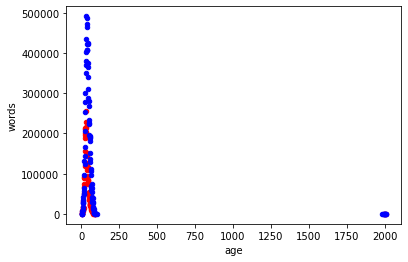

In [16]:
ax = women_age_words.plot(kind='scatter', x='age', y='words', color='red')
men_age_words.plot(ax=ax, kind='scatter', x='age', y='words', color='blue')

Now let's make a line plot of the exact same data. Copy and paste the code in the cell above and change it to produce a line plot instead of a scatter plot.

In [645]:
# Your code here
# Your code here

## Reflection

We have yet to tackle LLMs and ML, but you have learned and practiced a great deal of writing code that writes and creates digital media (with) data. Additionally, you have seen how Python and some of the language's community libraries, like pandas and matplotlib, offer you the capacity to wield computers in a way to read, understand, and create media representations of the data, and craft budding arguments about some social-cultural part of our society. 

With this experience under you belt, respond to the following three questions. Each response should be around 500-750 words that also weave the ideas from our readings.

1. What are the curiousities and advantages of coding that automates this work with such large amounts of data so quickly?
2. Consider Katz's *ethic of expediency* and Birhane's *relational ethics* with this automation of writing code and digital data. What are some potential unethical and harmful aspects of this expedient automation?
3. Reflect on the work about historical issues with data by Guyan and D'Ignazio and Klein. How do you understand data as as digital media? And, how is writing entangled in this process of deciding what to do with the data?